In [1]:
%cd ..
from black_scholes import BlackScholesPINN
import json
from utils import *
import matplotlib.pyplot as plt

with open("config.json") as f:
    config = json.load(f)

/Users/pieropaialunga/Desktop/MediumProject/PINN_Finance/BlackScholesPINN


In [2]:
bs = BlackScholesPINN(config)
bs.train()

# Evaluation
S_eval, t_eval = prepare_dataset(config)
C_pred = bs.predict(S_eval, t_eval).numpy()

Epoch 0 | Total: 85.407944 | Data: 85.407211 | PDE: 0.000734
Epoch 200 | Total: 12.045425 | Data: 11.560020 | PDE: 0.485404
Epoch 400 | Total: 2.551337 | Data: 2.065346 | PDE: 0.485991
Epoch 600 | Total: 1.155017 | Data: 0.908563 | PDE: 0.246454
Epoch 800 | Total: 0.703420 | Data: 0.594867 | PDE: 0.108553
Epoch 1000 | Total: 0.494027 | Data: 0.438144 | PDE: 0.055882
Epoch 1200 | Total: 0.394518 | Data: 0.366820 | PDE: 0.027698
Epoch 1400 | Total: 0.330364 | Data: 0.312483 | PDE: 0.017881
Epoch 1600 | Total: 0.296585 | Data: 0.285802 | PDE: 0.010783
Epoch 1800 | Total: 0.284138 | Data: 0.276279 | PDE: 0.007859


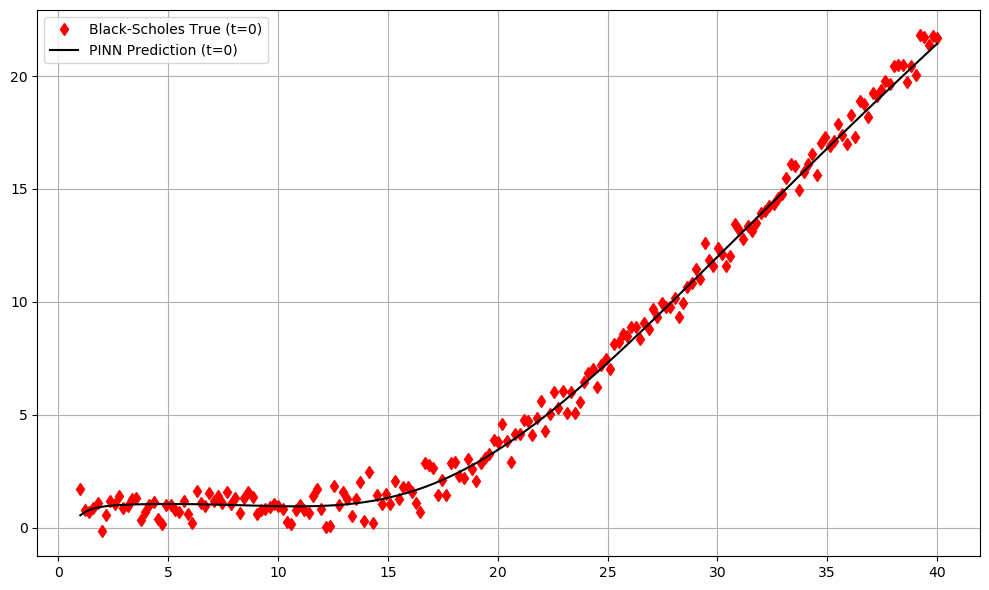

In [3]:
S_np = S_eval.numpy().flatten()
C_true = black_scholes_solution(S_np, config["K"], config["T"], config["r"], config["sigma"]) + config["bias"]
C_true += np.random.normal(0, config["noise_variance"], size=C_true.shape)


plt.figure(figsize=(10, 6))
plt.plot(S_np, C_true, 'd', label="Black-Scholes True (t=0)",color='red')
plt.plot(S_np, C_pred, label="PINN Prediction (t=0)", color='k')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()